In [1]:
%matplotlib inline

## Clustering

Una tarea muy común en el análisis de datos es el agrupamiento (clustering) de conjuntos de objetos, de tal manera que los objetos queden organizados en subgrupos en los que los elementos son más similares entre ellos que en relación con objetos de otros subgrupos. Este tipo de problemas corresponde al <b>aprendizaje no supervisado</b> y son de gran utilidad en diferentes campos. Si queremos establecer el patrón de comportamiento de un usuario de dispositivo móvil, se puede utilizar la información de GPS y los luagres de mayor interés para el usuario, en un cierto radio de cobertura, quedarán agrupados. 

El algoritmo EM puede ser usado como técnica de agrupamiento porque es en realidad una técnica no supervisada, que agrupa los datos en diferentes subconjuntos representando cada uno por una distribución Gaussiana, sin embargo existen otros métodos alternativos al EM, que pueden ser usados en problemas de agrupamiento (No en clasificación). 

## Referencias Generales

* [Cluster Analysis on Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
* [Modern hierarchical, agglomerative
clustering algorithms](https://arxiv.org/pdf/1109.2378v1.pdf)
* [Basic Principles of Clustering Methods](https://arxiv.org/pdf/1911.07891.pdf)

El análisis de cluster es el agrupamiento de individuos en una población para descubrir la estructura en los datos. Clustering es fundamentalmente una **colección de métodos para exploración de datos**. En este caso las muestras sólo cuentan con un vector de características ${\bf x}_i$ que las describe, pero no cuenta con un valor de salida objetivo. Por esa razón hacen parte del aprendizaje **No Supervisado**. Sin embargo, en muchos casos se usan como etapas previas para la aplicación de técncias supervisadas.

Un mismo conjunto de muestras puede tener diferentes formas de agrupación, por esa razón el método de agrupamiento debe realizarse de manera cuidadosa.

![alt text](local/imgs/Colorful_books.jpg  "Library")

## Métodos jerárquicos/aglomerativos

Son los métodos más comunes para resumir la estructura de un conjunto de muestras. Los esquemas de clustering aglomerativo comienzan con el conjunto de datos divido en nodos que representan cada una de las muestras y paso a paso van uniendo los nodos más cercanos para formar un nuevo nodo, hasta que el final sólo se obtiene un nodo que representa el conjunto de datos completo.

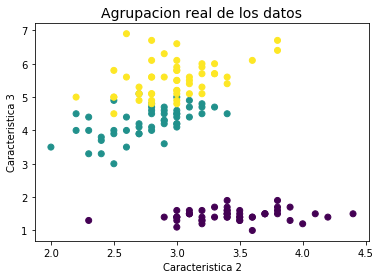

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:150][:,1:3]
y2 = y[:150]
plt.title('Agrupacion real de los datos', fontsize=14)
plt.xlabel('Caracteristica 2')
plt.ylabel('Caracteristica 3')
plt.scatter(X2[:,0], X2[:,1], c=y2);

In [3]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
distxy = pdist(X, metric='euclidean')

Text(0.5, 0, 'points')

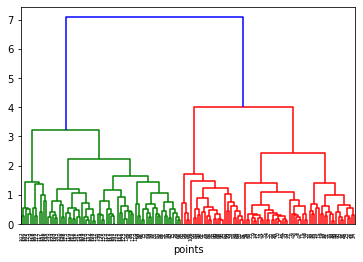

In [4]:
Z = linkage(distxy, method='complete')
plt.figure()
dn = dendrogram(Z)
plt.xlabel('points')

Text(0.5, 0, 'points')

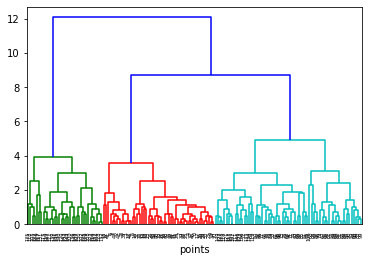

In [5]:
distxy = pdist(X, metric='minkowski', p=1)
Z = linkage(distxy, method='complete')
plt.figure()
dn = dendrogram(Z)
plt.xlabel('points')

Varios esquemas comparten el mismo principio de funcionamiento, pero difieren en la forma en que la medida de similitud entre clusters es actualizada después de cada paso. Algunas de las estrategias más usadas son:

| Nombre | Actualización de distancia $d(I \cup J,K)$ | Medida de distancia entre clusters $A$ y $B$|
| --- | --- | --- |
| single | $$\min (d(I,K), d(J,K))$$ | $$\min_{a \in A, b \in B} d[A,B]$$ |
| complete | $$\max (d(I,K), d(J,K))$$ | $$\max_{a \in A, b \in B} d[A,B]$$ |
| averages | $$\frac{n_Id(I,K) + n_Jd(J,K)}{n_I + n_J}$$ | $$\frac{1}{|A||B|}\sum_{a\in A}\sum_{b \in B} d[A,B]$$ |
| weighted | $$\frac{d(I,K) + d(J,K)}{2}$$ | $$\frac{1}{|A||B|}\sum_{a\in A}\sum_{b \in B} d[A,B]$$ |
| Ward | $$\sqrt{\frac{(n_I + n_K)d(I,K) + (n_J + n_K)d(J,K) + n_Kd(I,J)}{n_I + n_J + n_K}}$$ | $$\sqrt{\frac{2|A||B|}{|A|+|B|}}||\vec{c}_A - \vec{c}_B||_2$$ |
| centroid | $$\sqrt{\frac{n_Id(I,K) + n_Jd(J,K)}{n_I + n_J} - \frac{n_In_Jd(I,J)}{(n_I + n_J)^2}}$$ | $$||\vec{c}_A - \vec{c}_B||_2$$ |
| median | $$\sqrt{\frac{d(I,K)}{2} + \frac{d(J,K)}{2} - \frac{d(I,J)}{4}}$$ | $$||\vec{w}_A - \vec{w}_B||_2$$ |

La expresión $\vec{c}_X$ denota el centroide del cluster $X$. El punto $\vec{w}_X$ es definido iterativamente y se estima como: Si el cluster L está formado por la unión de I y J, $\vec{w}_X$ es el punto medio $\frac{1}{2}(\vec{w}_I + \vec{w}_J)$.

Text(0.5, 0, 'points')

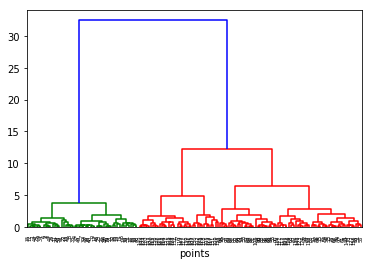

In [6]:
distxy = pdist(X, metric='euclidean')
Z = linkage(distxy, method='ward')
plt.figure()
dn = dendrogram(Z)
plt.xlabel('points')

Text(0.5, 0, 'points')

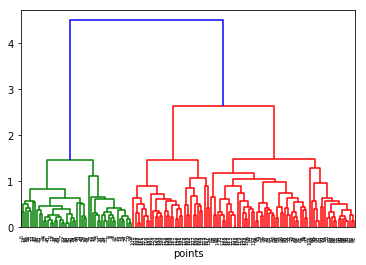

In [7]:
distxy = pdist(X, metric='euclidean')
Z = linkage(distxy, method='weighted')
plt.figure()
dn = dendrogram(Z)
plt.xlabel('points')

Text(0.5, 0, 'points')

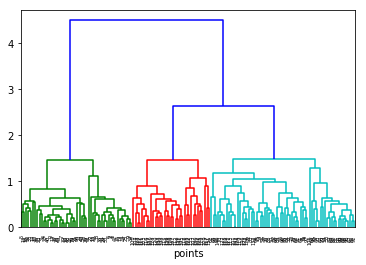

In [8]:
plt.figure()
dn = dendrogram(Z,color_threshold=0.5*max(Z[:,2]))#defaul 0.7*max(Z[:,2]).
plt.xlabel('points')

### Ventajas y desventajas de los métodos aglomerativos

* No es necesario definir previamente el número de clusters, pueden definirse a partir del dendograma o definiendo el umbral a partir de la distancia entre grupos.
* Son fáciles de implementar y los dendogramas son un herramienta últi para interpretar el resultado.
* Tienen problemas de costo computacional y no escalan bien en problemas de conjuntos de datos grandes, debido a que requiere una reestimación constante de la dintacia entre los nodos.
* No permite backtracking
* Puede sufrir el efecto de la cadena:

![alt text](./Images/Chaineffect.png  "Library")



## Métodos de clustering

* **Métodos duros**: En este caso se asigna cada muestra a exactamente un sólo cluster

* **Métodos suaves**: Métodos que asignan cada muestra a diferentes clusters o conglomerados con diferentes grados de pertenencia.

### k-means (método duro)

El algoritmo K-means es tal vez el más popular algoritmo de clustering, éste agrupa los datos intentando separar las muestras en $K$ grupos de igual varianza, minimizando un criterio conocido como la <em>inercia</em> o la dispersión intra-cluster:

Minimizar $$\sum_{k=1}^K \sum_{{\bf{x}}_k \in C_k} \| {\bf{x}}_k - \mu_k\|^2$$ Con respecto a $\mu_k$.

$\mu_k$ corresponde al centroide del cluster $k$-ésimo y $C_k$ representa todo el conjunto de muestras pertenecientes al cluster $k$. 

El algoritmo K-means es una popular variante del algoritmo EM, que permite hacer agrupamientos de forma simple. En primer lugar se asume que todos los closters son igualmente probables, es decir $\omega_i = 1/M$, y que la desviación es igual en todos, por consiguiente únicamente se pone enfásis en encontrar las medias de cada cluster, que en este contexto se conocen como <b>centroides</b>. Todos los puntos en un cluster están más cercanos a su centroide que al centroide de cualquier otro cluster. 

Una forma iterativa de resolver el problema se conoce como el algoritmo de Lloyd. El algoritmo consiste en los siguiente:

<img src="./Images/Lloyd.png" alt="algoritmo k-means" width="600"/>

El resultado del algoritmo se puede entrender a través de un diagra de Voronoi:

![alt text](./Images/K-means.gif "algoritmo k-means")

El procedimiento se puede extender a cualquier dimensión:

In [6]:
from library import Plot3Dkmeans

Plot3Dkmeans.Plot3Dk_means()

### Desventajas

* Es muy dependiente de la inicialización, se recomienda usar no una inicialización aleatoria, sino el parámetro **init='k-means++'**, que inicializa los centroides en puntos distantes  y produce mejores resultados. 

* En sklearn también se puede hacer uso del parámetro **n_init=10**, para que el algoritmo se inicialice varias veces y nos devuelva la solución de menor inercia.

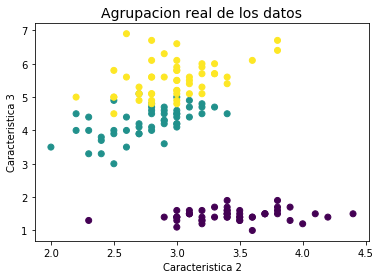

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:150][:,1:3]
y2 = y[:150]
plt.title('Agrupacion real de los datos', fontsize=14)
plt.xlabel('Caracteristica 2')
plt.ylabel('Caracteristica 3')
plt.scatter(X2[:,0], X2[:,1], c=y2);

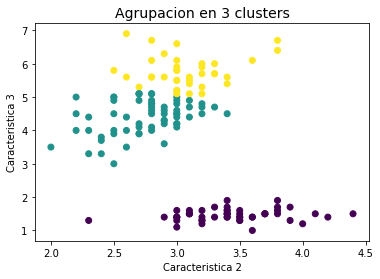

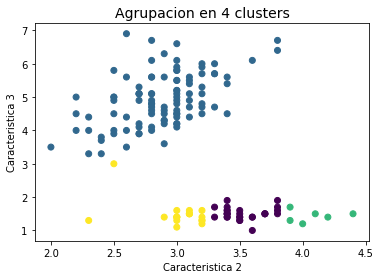

In [8]:
import numpy as np
from sklearn.cluster import KMeans
for M in range(3,5):
    kmeans = KMeans(init='random', n_clusters=M, n_init=1)
    kmeans.fit(X2)
    Y2 = kmeans.predict(X2)
    plt.figure()
    plt.title('Agrupacion en %d clusters' % M, fontsize=14)
    plt.xlabel('Caracteristica 2')
    plt.ylabel('Caracteristica 3')
    plt.scatter(X2[:,0], X2[:,1], c=Y2);

### Número de clusters

Escoger el número de clusters puede ser una tarea complicada cuando no se tiene información a priori sobre el número de grupos existente en los datos. Existen diferentes criterios para seleccionar el número de clusters, pero ninguno de ellos es completamente acertado. Una forma habitual es utilizar una medida conocida como el porcentaje de varianza explicada, el cual se define como el cociente entre la varianza entre grupos sobre total de varianza.

Text(0.5, 1.0, 'Elbow for KMeans clustering')

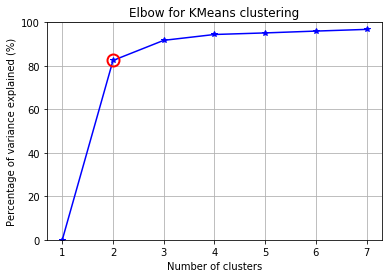

In [8]:
import numpy as np
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib import cm

X = X2

##### cluster data into K=1..20 clusters #####
K_MAX = 7
KK = range(1,K_MAX+1)

KM = [kmeans(X,k) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss          # The between-cluster sum of squares

##### plots #####
kIdx = 1        # K=10
mrk = 'os^p<dvh8>+x.'

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')

### Coeficiente silhouette 


Es una de las medidas más usadas para escoger el número de clusters. Asuma que las muestras han sido agrupadas en $k$ clusers, el coeficiente silhouette para una muestra está dado por:

$$ S(i) = \frac{b(i) - a(i)}{\max(a(i),b(i))}$$, si $|C_i| > 1$

$a(i) = \frac{1}{|C_i|-1}\sum_{j\in C_i, i \neq j} d(i,j)$ es la distancia media entre la muestra $i$, y todas las otras muestras en el mismo cluster.

$b(i) = \min_{k\neq i} \frac{1}{|C_k|} \sum_{j\in C_k} d(i,j)$ es la mínima distancia media de la muestra $i$ a todos las muestras de cualquiera de los otros clusters.

El valor medio de $S(i)$ se usa como un estimador de que tan bien quedaron agrupadas las muestras. El valor está entre -1 y 1, siendo 1 el valor deseado.

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

sillhoute_scores = []
n_cluster_list = np.arange(2,20).astype(int)
    
# Very important to scale!
sc = MinMaxScaler()
X = sc.fit_transform(X)

for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

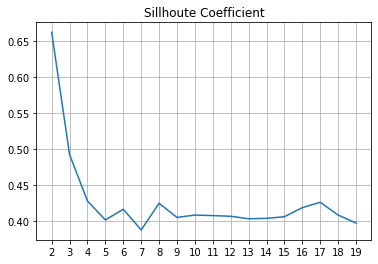

In [11]:
plt.plot(n_cluster_list,sillhoute_scores)
plt.xticks(range(2,20))
plt.title('Sillhoute Coefficient')
plt.grid()